In [1]:
import numpy               as np
import pylab               as pl
import matplotlib.pyplot   as plt
import astropy.io.fits     as fits

from   astropy.table       import Column, Table, join
from   astropy.coordinates import SkyCoord
from   astropy             import units as u
from   desitarget          import cuts


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/code/desitarget/0.28.0/lib/python3.6/site-packages/desitarget-0.28.0-py3.6.egg/desitarget/geomask.py:35: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/

In [2]:
#topdir = '/global/project/projectdirs/cosmo/data/legacysurvey/dr8/north/tractor/'
#tractor = topdir+'/150/tractor-1506p405.fits'
topdir = '/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/'
tractor = topdir + 'sweep-000m005-010p000.fits'

#copied from /global/cscratch1/sd/desiproc/dr8-cosmos
dat = fits.getdata(tractor)
tdat = Table(dat)
tdat['iselg']=np.array(cuts.isELG_colors(gflux=dat['flux_g'], rflux=dat['flux_r'], zflux=dat['flux_z'], south=False))
print('total source:%d total elg:%d ratio:%.4f'
      %(len(dat),tdat['iselg'].sum(),tdat['iselg'].sum()/len(dat)))

total source:5522115 total elg:92606 ratio:0.0168


In [6]:
g = 22.5 - 2.5*np.log10(dat['flux_g'].clip(1e-16))
r = 22.5 - 2.5*np.log10(dat['flux_r'].clip(1e-16))
z = 22.5 - 2.5*np.log10(dat['flux_z'].clip(1e-16))
tdat['isELGlike']=ELG_like_cut(g,r,z)
print('total source:%d total elg like:%d ratio:%.4f'
      %(len(dat),tdat['isELGlike'].sum(),tdat['isELGlike'].sum()/len(dat)))
print(0.0494/0.1141)

total source:5522115 total elg like:200330 ratio:0.0363
0.4329535495179667


In [4]:
fn_truth = '/global/cscratch1/sd/raichoor/desi_mcsyst/desi_mcsyst_truth.dr7.34ra38.-7dec-3.v2.fits'
truth = fits.getdata(fn_truth)
def ELG_cut(g,r,z,south=False):
    elg = np.ones_like(g,dtype='?')
    elg &= g > 20                       # bright cut.
    elg &= r - z > 0.3                  # blue cut.
    elg &= r - z < 1.6                  # red cut.
    elg &= g - r < -1.2*(r - z) + 1.6   # OII flux cut.
    # ADM cuts that are unique to the north or south.
    if south:
        elg &= g < 23.5  # faint cut.
    # ADM south has the FDR cut to remove stars and low-z galaxies.
        elg &= g - r < 1.15*(r - z) - 0.15
    else:
        elg &= g < 23.6  # faint cut.
        elg &= g - r < 1.15*(r - z) - 0.35  # remove stars and low-z galaxies.
    return elg
ttruth = Table(truth)
ttruth['iselg']=ELG_cut(ttruth['g'],ttruth['r'],ttruth['z'])
print('total source:%d total elg:%d ratio:%.4f'
      %(len(ttruth),ttruth['iselg'].sum(),ttruth['iselg'].sum()/len(ttruth)))

total source:367480 total elg:7694 ratio:0.0209


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


In [5]:
def ELG_like_cut(g,r,z,south=False):
    elg = np.ones_like(g,dtype='?')
    elg &= g > 19.8                       # bright cut.
    elg &= r - z > 0.1                  # blue cut.
    elg &= r - z < 1.8                  # red cut.
    elg &= g - r < -1.2*(r - z) + 1.8   # OII flux cut.
    # ADM cuts that are unique to the north or south.
    if south:
        elg &= g < 23.7  # faint cut.
    # ADM south has the FDR cut to remove stars and low-z galaxies.
        elg &= g - r < 1.15*(r - z) + 0.05
    else:
        elg &= g < 23.8  # faint cut.
        elg &= g - r < 1.15*(r - z) - 0.15  # remove stars and low-z galaxies.
    return elg


ttruth['iselglike']=ELG_like_cut(ttruth['g'],ttruth['r'],ttruth['z'])
print('total source:%d total elg_like:%d ratio:%.4f'
      %(len(ttruth),ttruth['iselglike'].sum(),ttruth['iselglike'].sum()/len(ttruth)))

total source:367480 total elg_like:18254 ratio:0.0497


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


In [7]:
ttruth_elg_like = Table(ttruth[ttruth['iselglike']])


AttributeError: 'Table' object has no attribute 'writeto'

In [9]:
ttruth_elg_like.write('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/dr8/SV/elg_like.fits')

In [180]:
#ratio of ELG/ELG_like
0.0209/0.0497

0.42052313883299797

Text(0.5,0,'r-z')

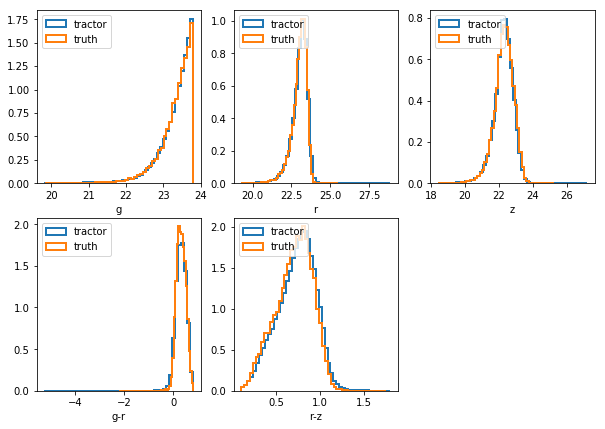

In [181]:
plt.figure(figsize=(10,7))
plt.subplot(2,3,1)
g = 22.5 - 2.5*np.log10(tdat['FLUX_G'].clip(1e-16))
plt.hist(g[tdat['isELGlike']],histtype='step',linewidth=2,density=True,bins=50,label='tractor')
p=plt.hist(ttruth[ttruth['iselglike']]['g'].quantity,histtype='step',linewidth=2,density=True,bins=50,label='truth')
plt.legend(loc='upper left')
plt.xlabel('g')

plt.subplot(2,3,2)
r = 22.5 - 2.5*np.log10(tdat['FLUX_R'].clip(1e-16))
plt.hist(r[tdat['isELGlike']],histtype='step',linewidth=2,density=True,bins=50,label='tractor')
p=plt.hist(ttruth[ttruth['iselglike']]['r'].quantity,histtype='step',linewidth=2,density=True,bins=50,label='truth')
plt.legend(loc='upper left')
plt.xlabel('r')

plt.subplot(2,3,3)
z = 22.5 - 2.5*np.log10(tdat['FLUX_Z'].clip(1e-16))
plt.hist(z[tdat['isELGlike']],histtype='step',linewidth=2,density=True,bins=50,label='tractor')
p=plt.hist(ttruth[ttruth['iselglike']]['z'].quantity,histtype='step',linewidth=2,density=True,bins=50,label='truth')
plt.legend(loc='upper left')
plt.xlabel('z')

plt.subplot(2,3,4)
plt.hist(g[tdat['isELGlike']]-r[tdat['isELGlike']],histtype='step',linewidth=2,density=True,bins=50,label='tractor')
p=plt.hist(ttruth[ttruth['iselglike']]['g'].quantity-ttruth[ttruth['iselglike']]['r'].quantity,histtype='step',linewidth=2,density=True,bins=50,label='truth')
plt.legend(loc='upper left')
plt.xlabel('g-r')

plt.subplot(2,3,5)
plt.hist(r[tdat['isELGlike']]-z[tdat['isELGlike']],histtype='step',linewidth=2,density=True,bins=50,label='tractor')
p=plt.hist(ttruth[ttruth['iselglike']]['r'].quantity-ttruth[ttruth['iselglike']]['z'].quantity,histtype='step',linewidth=2,density=True,bins=50,label='truth')
plt.legend(loc='upper left')
plt.xlabel('r-z')

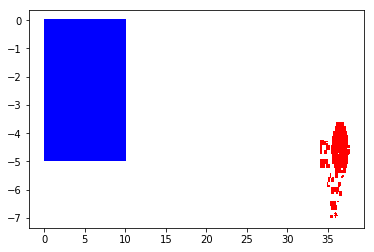

In [182]:
plt.plot(tdat['RA'],tdat['DEC'],'b,')
plt.plot(ttruth['ra'],ttruth['dec'],'r,')

In [183]:
!ls /global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/

legacysurvey_dr8_south_sweep_8.0.sha256sum  sweep-150p010-160p015.fits
sweep-000m005-010p000.fits		    sweep-150p015-160p020.fits
sweep-000m010-010m005.fits		    sweep-150p020-160p025.fits
sweep-000m015-010m010.fits		    sweep-150p025-160p030.fits
sweep-000m020-010m015.fits		    sweep-150p030-160p035.fits
sweep-000m025-010m020.fits		    sweep-150p035-160p040.fits
sweep-000m030-010m025.fits		    sweep-160m005-170p000.fits
sweep-000m035-010m030.fits		    sweep-160m010-170m005.fits
sweep-000m040-010m035.fits		    sweep-160m015-170m010.fits
sweep-000m045-010m040.fits		    sweep-160p000-170p005.fits
sweep-000m050-010m045.fits		    sweep-160p005-170p010.fits
sweep-000m055-010m050.fits		    sweep-160p010-170p015.fits
sweep-000m060-010m055.fits		    sweep-160p015-170p020.fits
sweep-000m065-010m060.fits		    sweep-160p020-170p025.fits
sweep-000m070-010m065.fits		    sweep-160p025-170p030.fits
sweep-000p000-010p005.fits		    sweep-160p030-170p035.fits
sweep-000p005-010p010.fits		    sweep-170m00